Date Created: July 7th, 2022

---
## Project 1: Thermal Explosion
**Authors:** Tyler Reiser, Brian Tan, Mason Friedberg   
**Class:** APPM 4650: Int. Numerical Analysis at CU Boulder   
**Summary:** Modeling the thermal explosion created by putting chemicals in a box.   

---

In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook 
plt.style.use('bmh')

---
#### Reaction Kinetics
$k = B e^\frac{-E}{RT}$

and $\frac{dE}{dt} = \frac{d\theta}{dt} - S$.

And we have the rate of change in the box as $C_N \frac{dE}{dt} = - C \frac{dA_F}{dt} - H(T - T_0)$.

where $\frac{dA_F}{dt} = - C A e^\frac{-E}{RT}$.

#### Scaling
This is a stiff differential equation, so we have to scale the step size to ensure the explosion can be approximated numerically.

The equations is scaled two times in the following ways:  
First, define $T^* = \frac{T}{T_0}$ and $\tau = \frac{t}{t_r}$ where $t_r$ is defined as the relative time.  
Now define $T* = 1 + \epsilon \theta$ for $\epsilon = \frac{T_0 R}{E}$ so that the initial condition is $T^*(0) = 1$.

And $\frac{d\theta}{d\tau} = e^\theta - \frac{\theta}{\delta}$ where $\delta$ is proportional to $\frac{1}{H}$ and $H$ is the step size.

Now let $\tau = \delta \sigma$ and we get the non-adiabatic, scaled equation: $\frac{d\theta}{d\sigma} = \delta e^\theta-\theta$ for $\theta (0) = 0$. This is the differential equation to be solved.

#### Parameters
The *temperature*, $T$, is a function of *time*, $t$, so $T = T(t)$. This process will begin at room temperature and labeled as $T_0$. 
>All temperature's must be *absolute*, ie. Kelvin 
>- why are these conditions interesting? 
>- how big can we go with delta? 

In [2]:
theta = 0 # initial temp, ie. THETA(0) = 0

# time mesh
t0 = 0.
dt = 0.016  # time step must be sufficiently small
tmax = 1.
vector_t = np.arange(t0, tmax, dt) # time-scale
n = len(vector_t)

# delta values
oscillation_point = 1/dt
delta_fizzle = dt
delta_explosion = 1.51

# initial conditions
rk4_data = np.zeros((n, 1))
rk4_data[0, 0] = theta

k1 = np.array([0., 0., 0.])
k2 = np.array([0., 0., 0.])
k3 = np.array([0., 0., 0.])
k4 = np.array([0., 0., 0.])

In [3]:
oscillation_point

62.5

For any real number, $\delta$, we have three cases:
1. if $\delta e^\theta > \theta$, then $\theta$ grows exponentially   
2. if $\delta e^\theta < \theta$, then $\theta$ decreases for a while   
3. if $\delta e^\theta = \theta$ or $\delta e^\theta = 1$ , then an *oscilation point* exists

Fix $\delta$ so that $\delta > \frac{1}{e}$ to ensure $\delta e^\theta > \theta$.

In [4]:
def equation_1(t, theta, delta):
    return delta*np.exp(theta) - theta

### Fourth-order Runge Kutta 

In [5]:
def RK4(t, theta, equation_1, delta, dt):
    k1[0] = dt*equation_1(t, theta, delta)
    k2[0] = dt*equation_1(t + dt/2., theta + k1[0]/2., delta)
    k3[0] = dt*equation_1(t + dt/2., theta + k2[0]/2., delta)
    k4[0] = dt*equation_1(t + dt, theta + k3[0], delta)

    theta = theta + (1./6.)*(k1[0] + 2.*k2[0] + 2.*k3[0] + k4[0])
    return theta

#### Plotting the three cases
>- What should the conditions be to show something interesting?
>- what do we want to show?
>- how can the plots be better? 
>- ...


<IPython.core.display.Javascript object>


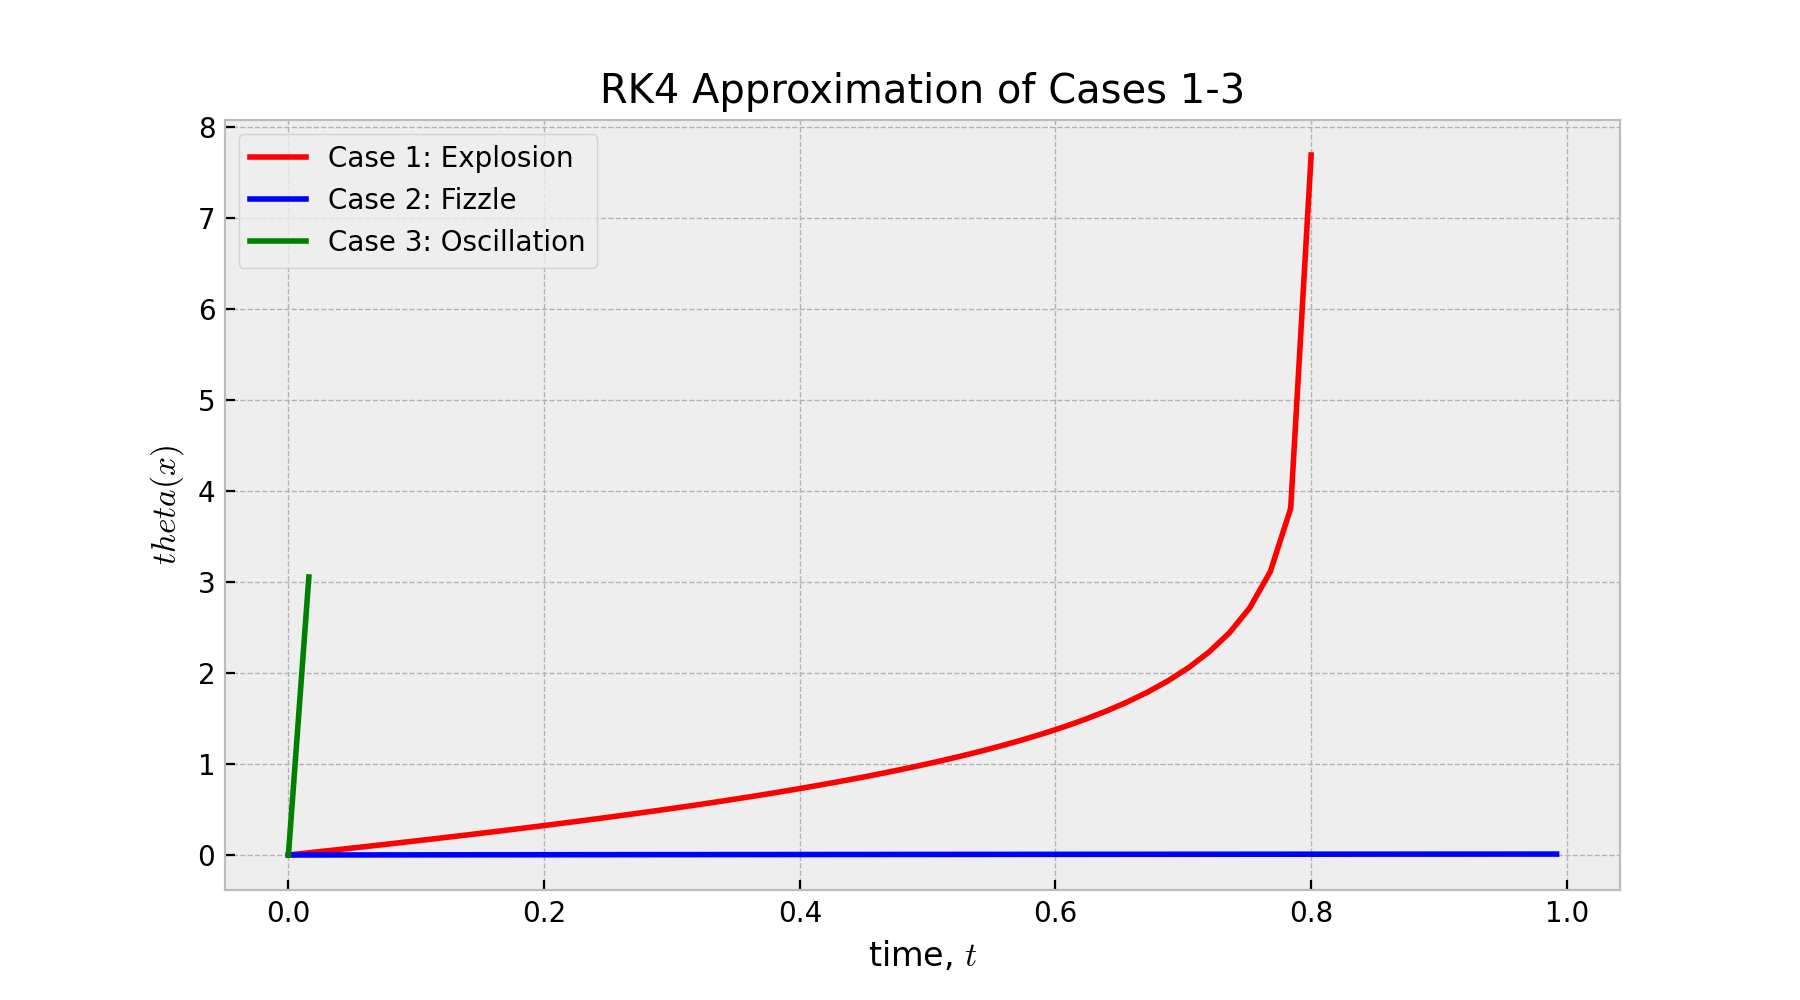

/var/folders/yy/tgnx4yvs65n5w70kcy3_2b000000gn/T/ipykernel_23288/1697203138.py:2: RuntimeWarning: overflow encountered in exp
  return delta*np.exp(theta) - theta
/var/folders/yy/tgnx4yvs65n5w70kcy3_2b000000gn/T/ipykernel_23288/1697203138.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return delta*np.exp(theta) - theta


In [14]:
plt.figure('Project-1 Thermal Explosion', figsize=(9, 5))
plt.title('RK4 Approximation of Cases 1-3')
plt.ylabel('$theta (x)$')
plt.xlabel('time, $t$')

for i in range(n - 1):
    rk4_data[i+1, :] = RK4(vector_t[i], rk4_data[i, 0], equation_1, delta_explosion, dt)
plt.plot(vector_t[:], rk4_data[:], color='r', label='Case 1: Explosion')

for i in range(n - 1):
    rk4_data[i+1, :] = RK4(vector_t[i], rk4_data[i, 0], equation_1, delta_fizzle, dt)
plt.plot(vector_t[:], rk4_data[:], color='b', label='Case 2: Fizzle')

for i in range(n - 1): 
    rk4_data[i+1, :] = RK4(vector_t[i], rk4_data[i, 0], equation_1, oscillation_point, dt)
plt.plot(vector_t[:], rk4_data[:], color='g', label='Case 3: Oscillation')

plt.legend()

#### Write-up

>- what happened? 
>- what does the plot show?
>- what's up with the green/oscillation point?
>- research questions?

---

#### References

[1]:   

[2]: